In [1]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd
import numpy as np
import os

In [2]:
athlete_events = pd.read_csv('../CSV for ML models/athlete_events.csv')
athlete_events.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [3]:
filter_data = athlete_events[["Sex", "Age", "Height", "Weight", "Team", "Year", "Season", "Sport", "Event", "Medal"]]
filter_data.head()

,Sex,Age,Height,Weight,Team,Year,Season,Sport,Event,Medal
0,M,24.0,180.0,80.0,China,1992,Summer,Basketball,Basketball Men's Basketball,NaN
1,M,23.0,170.0,60.0,China,2012,Summer,Judo,Judo Men's Extra-Lightweight,NaN
2,M,24.0,NaN,NaN,Denmark,1920,Summer,Football,Football Men's Football,NaN
3,M,34.0,NaN,NaN,Denmark/Sweden,1900,Summer,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,F,21.0,185.0,82.0,Netherlands,1988,Winter,Speed Skating,Speed Skating Women's 500 metres,NaN


In [4]:
winter_data = filter_data[filter_data["Season"] == "Winter"]
winter_data.head()

,Sex,Age,Height,Weight,Team,Year,Season,Sport,Event,Medal
4,F,21.0,185.0,82.0,Netherlands,1988,Winter,Speed Skating,Speed Skating Women's 500 metres,NaN
5,F,21.0,185.0,82.0,Netherlands,1988,Winter,Speed Skating,"Speed Skating Women's 1,000 metres",NaN
6,F,25.0,185.0,82.0,Netherlands,1992,Winter,Speed Skating,Speed Skating Women's 500 metres,NaN
7,F,25.0,185.0,82.0,Netherlands,1992,Winter,Speed Skating,"Speed Skating Women's 1,000 metres",NaN
8,F,27.0,185.0,82.0,Netherlands,1994,Winter,Speed Skating,Speed Skating Women's 500 metres,NaN


In [5]:
summer_data = filter_data[(filter_data["Season"] == "Summer")]
summer_data.head()


,Sex,Age,Height,Weight,Team,Year,Season,Sport,Event,Medal
0,M,24.0,180.0,80.0,China,1992,Summer,Basketball,Basketball Men's Basketball,NaN
1,M,23.0,170.0,60.0,China,2012,Summer,Judo,Judo Men's Extra-Lightweight,NaN
2,M,24.0,NaN,NaN,Denmark,1920,Summer,Football,Football Men's Football,NaN
3,M,34.0,NaN,NaN,Denmark/Sweden,1900,Summer,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
26,F,18.0,168.0,NaN,Netherlands,1932,Summer,Athletics,Athletics Women's 100 metres,NaN


In [7]:
summer_sports = summer_data["Sport"].unique()
winter_sports = winter_data['Sport'].unique()

In [8]:
Gymnastics_M = summer_data[(summer_data["Sport"] == "Gymnastics") & (summer_data["Sex"] == "M")]

In [9]:
Gymnastics_M = Gymnastics_M[["Age", "Height", "Weight", "Medal"]]
Gymnastics_M = Gymnastics_M.dropna(subset=['Height', 'Weight']).reset_index(drop = True)

In [10]:
Gymnastics_M = Gymnastics_M.replace("Gold", 1)
Gymnastics_M = Gymnastics_M.replace("Silver", 1)
Gymnastics_M = Gymnastics_M.replace("Bronze", 1)
Gymnastics_M["Medal"] = Gymnastics_M["Medal"].fillna(0)
Gymnastics_M = Gymnastics_M.dropna()

In [11]:
y = Gymnastics_M["Medal"]
target_names = ["Medals", "None"]

In [12]:
X = Gymnastics_M.drop("Medal", axis=1)
X.head()

,Age,Height,Weight
0,28.0,175.0,64.0
1,28.0,175.0,64.0
2,28.0,175.0,64.0
3,28.0,175.0,64.0
4,28.0,175.0,64.0


In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [14]:
from sklearn.preprocessing import StandardScaler

X_scaler = StandardScaler().fit(X_train)

In [15]:
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

k: 11, Train/Test Score: 0.941/0.937
k: 17, Train/Test Score: 0.940/0.938
k: 23, Train/Test Score: 0.940/0.937
k: 29, Train/Test Score: 0.940/0.937
k: 35, Train/Test Score: 0.940/0.937
k: 41, Train/Test Score: 0.940/0.937


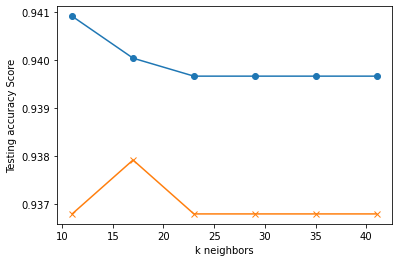

In [16]:
train_scores = []
test_scores = []
for k in range(11, 47, 6):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    train_score = knn.score(X_train_scaled, y_train)
    test_score = knn.score(X_test_scaled, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
    
plt.plot(range(11, 47, 6), train_scores, marker='o')
plt.plot(range(11, 47, 6), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.show()

In [17]:
knn = KNeighborsClassifier(n_neighbors=13)
knn.fit(X_train_scaled, y_train)
print('k=13 Test Acc: %.3f' % knn.score(X_test_scaled, y_test))

k=13 Test Acc: 0.938
